In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
#Thomas

In [3]:
lockdown_dates = pd.read_csv("https://covid605.s3.amazonaws.com/countryLockdowndatesJHUMatch.csv")
global_mobility = pd.read_csv("https://covid605.s3.amazonaws.com/Global_Mobility_Report.csv")
tempa_traffic = pd.read_csv("https://covid605.s3.amazonaws.com/TampaTraffic.csv")
emissions_master = pd.read_csv("https://covid605.s3.amazonaws.com/ad_aqi_tracker_data_Master.csv")
#emissions = pd.read_csv("/home/brys/Documents/DATA605/ad_aqi_tracker_data_Master.csv")

/Users/thomas/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Eric

In [5]:
nj_emmisions = emissions_master.copy()
nj_mobility = global_mobility.copy()[(global_mobility.country_region == 'United States')][(global_mobility.sub_region_1 == 'New Jersey')]

/Users/thomas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [6]:
nj_emmisions['5-year Average (2015-2019)'] = pd.to_numeric(nj_emmisions['5-year Average (2015-2019)'])

In [7]:
#all the nj counties 
nj_counties = set(nj_mobility['sub_region_2'].tolist())
nj_counties = {x for x in nj_counties if x==x}
nj_counties = list(nj_counties)
#make emmisions county name consisitent with mobility dataset county names
nj_emmisions['County'] = [county + ' County' for county in nj_emmisions['County']]

In [8]:
#remove unused features
nj_mobility_mask = nj_mobility['sub_region_2'].isin(nj_counties)
nj_mobility_selected = nj_mobility.loc[nj_mobility_mask,:].drop(['country_region_code', 'country_region', 'sub_region_1'], axis=1)

nj_emmisions_mask = nj_emmisions['County'].isin(nj_counties)
nj_emmisions_selected = nj_emmisions.loc[nj_emmisions_mask,:].drop(['Main Pollutant', 'Site Name', 'Site ID', 'Source'], axis =1)
#make feature names consistent in two tables
nj_mobility_selected = nj_mobility_selected.rename(columns={'sub_region_2':'County', 'date':'Date'})

In [9]:
#change the DATE format of two datasets
nj_mobility_selected['Date'] = pd.to_datetime(nj_mobility_selected['Date'])
nj_emmisions_selected['Date'] = pd.to_datetime(nj_emmisions_selected['Date'])
nj_emmisions_selected['Date'] = nj_emmisions_selected['Date'].dt.strftime('%m/%d/%Y')
nj_mobility_selected['Date'] = nj_mobility_selected['Date'].dt.strftime('%m/%d/%Y')

In [10]:
#merge two tables based on Date and County names
both_nj = pd.merge(nj_emmisions_selected, nj_mobility_selected, left_on=['County','Date'], right_on=['County','Date'])

In [11]:
both_nj.dtypes

Date                                                   object
 AQI Value                                              int64
County                                                 object
20-year High (1980-2019)                                int64
20-year Low (1980-2019)                                 int64
5-year Average (2015-2019)                            float64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [12]:
both_nj

,Date,AQI Value,County,20-year High (1980-2019),20-year Low (1980-2019),5-year Average (2015-2019),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,02/15/2020,28,Atlantic County,59,27,35.20,14.0,7.0,11.0,18.0,2.0,0.0
1,02/16/2020,29,Atlantic County,62,21,33.40,15.0,7.0,29.0,22.0,4.0,-1.0
2,02/17/2020,40,Atlantic County,53,26,37.20,17.0,5.0,67.0,2.0,-23.0,4.0
3,02/18/2020,34,Atlantic County,48,20,35.40,8.0,7.0,34.0,10.0,4.0,-1.0
4,02/19/2020,32,Atlantic County,56,19,37.40,7.0,5.0,25.0,13.0,3.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1426,05/12/2020,40,Warren County,99,20,42.60,-26.0,-15.0,NaN,-10.0,-46.0,19.0
1427,05/13/2020,40,Warren County,84,1,24.40,-21.0,-13.0,NaN,-5.0,-46.0,20.0
1428,05/14/2020,49,Warren County,54,19,35.20,-23.0,-15.0,NaN,-13.0,-47.0,18.0
1429,05/15/2020,58,Warren County,74,25,42.25,-24.0,-15.0,NaN,-16.0,-46.0,20.0


In [13]:
#BRYS

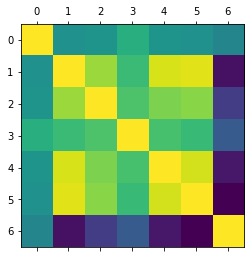

In [14]:
#Simple correlation matrix
#Just the first column/row is interesting bc that is the AQI correlation to the mobility types
plt.matshow(both_nj[[
                            ' AQI Value', 
                            'retail_and_recreation_percent_change_from_baseline', 
                            'grocery_and_pharmacy_percent_change_from_baseline',
                            'parks_percent_change_from_baseline',
                            'transit_stations_percent_change_from_baseline',
                            'workplaces_percent_change_from_baseline',
                            'residential_percent_change_from_baseline']].corr())
plt.show()

In [16]:
def plot_nj_county(county_name):
    #leap day 5-year averages are missing - lol
    #county_emissions = emissions[emissions['County'] == county_name][emissions['Date'] != '2020-02-29']
    
    #county_mobility = nj_mobility_selected[(nj_mobility_selected.country_region == 'United States')][(nj_mobility_selected.sub_region_1 == 'New Jersey')][nj_mobility_selected.sub_region_2 == county_name + ' County']
    
#    county_mobility = county_mobility.rename(columns={'date':'Date'})
    #mercer_nj = mercer_nj_emissions.set_index('Date').join(mercer_nj_mobility.set_index('Date'))
 #   county = county_emissions.set_index('Date').join(county_mobility.set_index('Date'))
  #  county_both = county[county.country_region_code == 'US']
    #county_both_aqi_average = sum(county_both[' AQI Value']) / len(county_both[' AQI Value'])
    #plt.plot(county_both.index, [x - county_both_aqi_average for x in county_both[' AQI Value']], label = " AQI Value")
    county_both = both_nj[both_nj['County'] == county_name]
    print(county_both.shape)
    
    plt.plot(county_both['Date'], county_both[' AQI Value'] - county_both['5-year Average (2015-2019)'], label="AQI")
    plt.plot(county_both['Date'], county_both['retail_and_recreation_percent_change_from_baseline'], label = "retail")
    plt.plot(county_both['Date'], county_both['workplaces_percent_change_from_baseline'], label = "workplace")
    plt.plot(county_both['Date'], county_both['transit_stations_percent_change_from_baseline'], label = "transit")
    plt.plot(county_both['Date'], county_both['parks_percent_change_from_baseline'], label = "parks")
    plt.plot(county_both['Date'], county_both['grocery_and_pharmacy_percent_change_from_baseline'], label = "grocery")
    #lockdown date in us
    #plt.axvline(x='2020-03-18')
    plt.axvline(x='03/18/2020')
    plt.legend(loc="upper center")
    #ax.locator_params(nbins=10, axis='x')
    plt.show()
    
@interact
def choose_nj_county(county = nj_emmisions['County'].unique()):
    print('chosen: ' + county)
    plot_nj_county(county)

interactive(children=(Dropdown(description='county', options=('Atlantic County', 'Bergen County', 'Camden Coun…

In [17]:
#KUSH

In [18]:
both_nj["Average Mobility"] = (both_nj.retail_and_recreation_percent_change_from_baseline + both_nj.grocery_and_pharmacy_percent_change_from_baseline + both_nj.parks_percent_change_from_baseline + both_nj.transit_stations_percent_change_from_baseline + both_nj.workplaces_percent_change_from_baseline + both_nj.residential_percent_change_from_baseline) / 5


In [19]:
both_nj.dropna(inplace=True)

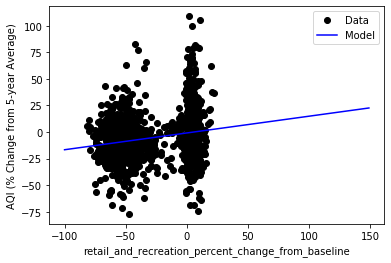

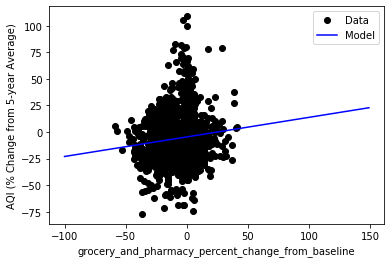

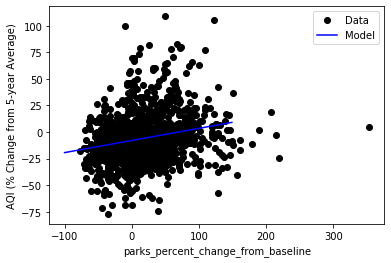

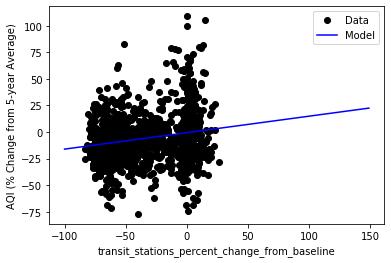

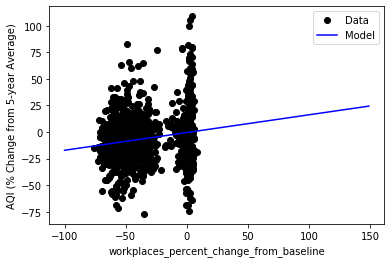

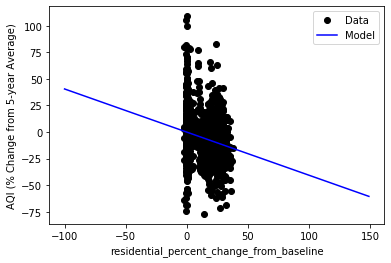

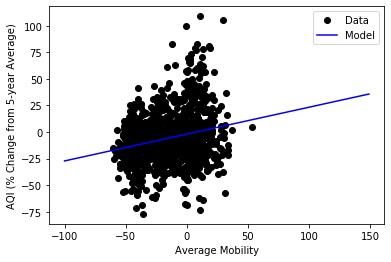

In [20]:
col = both_nj.columns[6:]
y = (both_nj[" AQI Value"] - both_nj["5-year Average (2015-2019)"]) / both_nj["5-year Average (2015-2019)"] * 100
for i in col:
    x = both_nj[i]
    c = np.polyfit(x,y,1)
    p = np.poly1d(c)
    fig = plt.figure()
    ax1  = fig.add_subplot(111)
    plt.plot(x, y, 'ko', label="Data")
    x_extrapolate = range(-100,150)
    plt.plot(x_extrapolate,p(x_extrapolate), 'b-')
    plt.xlabel(i)
    plt.ylabel("AQI (% Change from 5-year Average)")
    plt.legend(["Data","Model"])
    plt.show()